### Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

#### Описание данных

Данные для первой части: <br/>
Файл hypothesis.csv.<br/>
Hypothesis — краткое описание гипотезы;<br/>
Reach — охват пользователей по 10-балльной шкале;<br/>
Impact — влияние на пользователей по 10-балльной шкале;<br/>
Confidence — уверенность в гипотезе по 10-балльной шкале;<br/>
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. <br/>
Чем больше значение Efforts, тем дороже проверка гипотезы.<br/><p><p/>
Данные для второй части:<br/>
Файл orders.csv.<br/>
transactionId — идентификатор заказа;<br/>
visitorId — идентификатор пользователя, совершившего заказ;<br/>
date — дата, когда был совершён заказ;<br/>
revenue — выручка заказа;<br/>
group — группа A/B-теста, в которую попал заказ.<br/><p><p/>
Файл visitors.csv.<br/>
date — дата;<br/>
group — группа A/B-теста;<br/>
visitors — количество пользователей в указанную дату в указанной группе A/B-теста<br/>

#### Знакомство с данными

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
#from scipy import stats as st
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters

In [2]:
hypo = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
hypo.columns = hypo.columns.str.lower()
display(hypo.head(10))

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
display(orders.head())
display(orders.tail())

# Cуммарная выручка в каждой из групп теста. 
data_new = (
    orders.groupby('group', as_index=False)
    .agg({'revenue': 'sum'})
)
print(data_new)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


  group  revenue
0     A  4084803
1     B  5907760


Выручка группы В на  1 822 957 у.е. больше, чем у группы А. <br/>
Но пока рано делать выводы.

In [4]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
display(visitors.head())
display(visitors.tail())

# Суммарное число пользователей в каждой из групп теста. 
data_new = (
    visitors.groupby('group', as_index=False)
    .agg({'visitors': 'sum'})
)
print(data_new)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


  group  visitors
0     A     18736
1     B     18916


### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.<br/><p><p/>
Задача: <br/>
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br/>
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.<br/>
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Фреймворк ICE для приоритизации гипотез

In [5]:
# для отображения полного текста в столбце:
pd.set_option('display.max_colwidth', None)

# Считаем ICE для гипотез

hypo['ICE'] = (hypo['impact'] * hypo['confidence']) / hypo['efforts']

print(hypo[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

#### Фреймворк RICE для приоритизации гипотез

In [6]:
# для отображения полного текста в столбце:
pd.set_option('display.max_colwidth', None)

# Расчёт показателя RICE для гипотез: RICE = (Reach x Impact x Confidence)/Efforts

hypo['RICE'] = (hypo['reach'] * hypo['impact'] * hypo['confidence']) / hypo['efforts']

print(hypo[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Промежуточные выводы по приоритизации гипотез.

<b>ICE:</b>

Первые пять гипотез с наибольшим показателем ICE не являются сложными и не требуют больших затрат на разработку (Effort), поэтому, вероятно, это является причиной высокого показателя ICE: <br/>
- 8 Запустить акцию, дающую скидку на товар в день рождения   
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
- 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
- 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  

<b>RICE:</b>

Чем больше охват пользователей (Reach), тем выше показатель RICE.<br/>
Например, емейл-рассылками можно охватить гораздо больше пользователей, чем акциями, дающими скидку в день рождения.<br/>
Также, здесь влияет и фактор затрат на разработку.<br/>

- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
- 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
- 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
- 8 Запустить акцию, дающую скидку на товар в день рождения  

### Часть 2. Анализ A/B-теста

Результаты A/B-теста описаны в файлах orders.csv и visitors.csv.<br/><p><p/>
Задача <br/>
Проанализировать A/B-тест:<br/>
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.<br/> Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. <br/> Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.<br/>  Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. <br/> Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

#### График кумулятивной выручки по группам

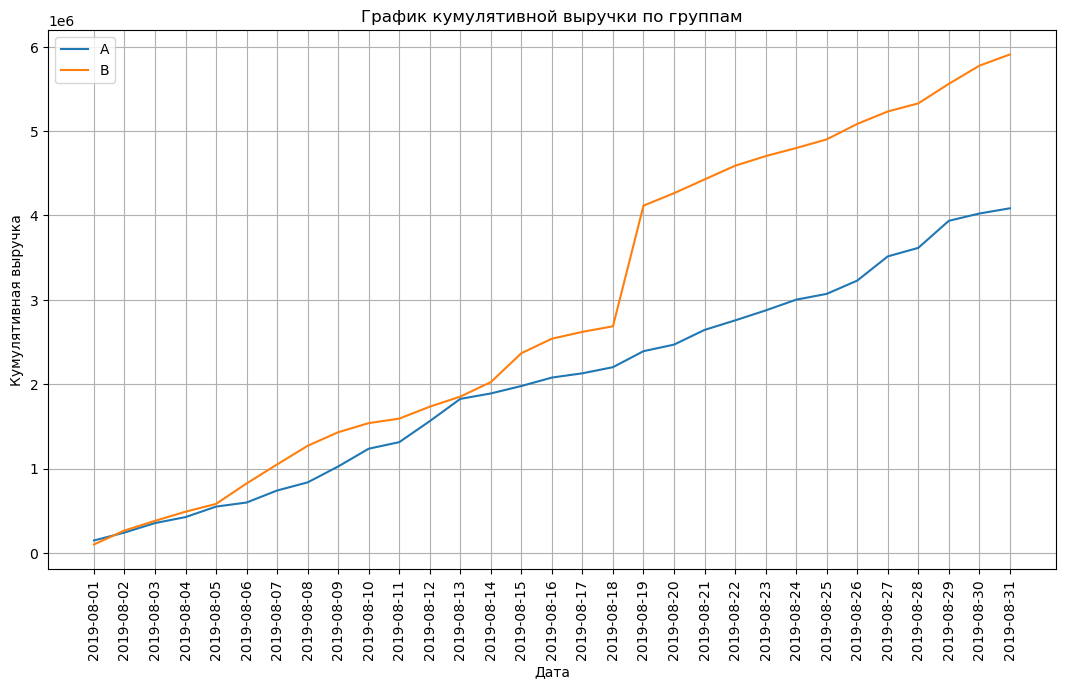

In [7]:
# orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
# visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors'
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] =='A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] =='B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(13, 7))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


Выручка по обеим группам растет в течение всего времени. Наблюдается резкий скачок в группе В после 18 августа, неизвестно пока по какой причине.

#### График кумулятивного среднего чека по группам

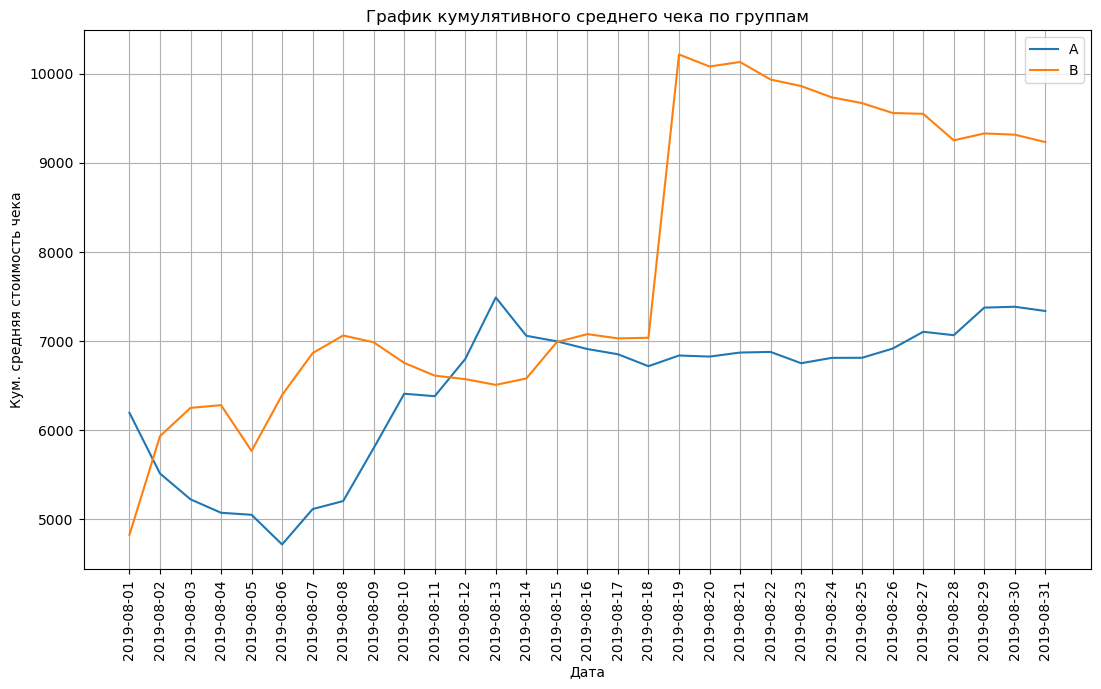

In [8]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(13, 7))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кум. средняя стоимость чека')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

В начале теста средний чек по группе А ниже, чем у группы В, затем некоторый скачок 13 августа, далее стабилизировался. <br/>
Резкий скачок среднего чека  19 августа в группе В предположительно из-за дорогой покупки, после него стабильно плавно идет вниз. Возможно в данных есть выбросы.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

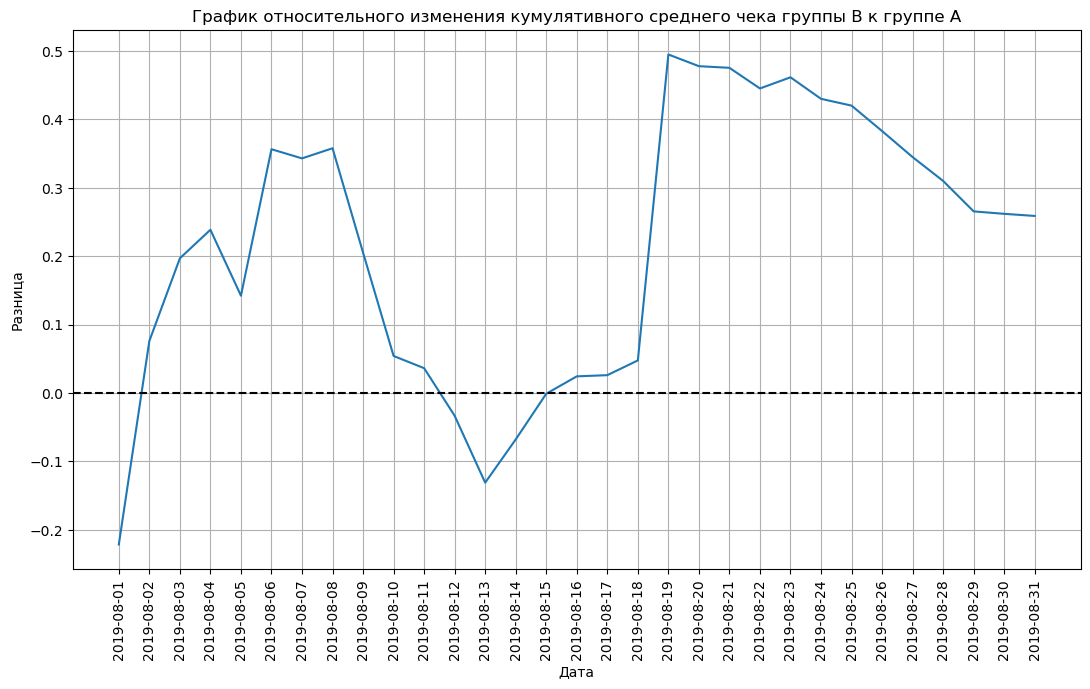

In [9]:
# График относительного различия для среднего чека. 

# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13, 7))

# Строим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем горизонтальную ось ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Разница')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

В нескольких точках график различия между сегментами резко «скачет». <br/>
Вероятно где-то есть крупные заказы и выбросы...

#### График кумулятивного среднего количества заказов на посетителя по группам

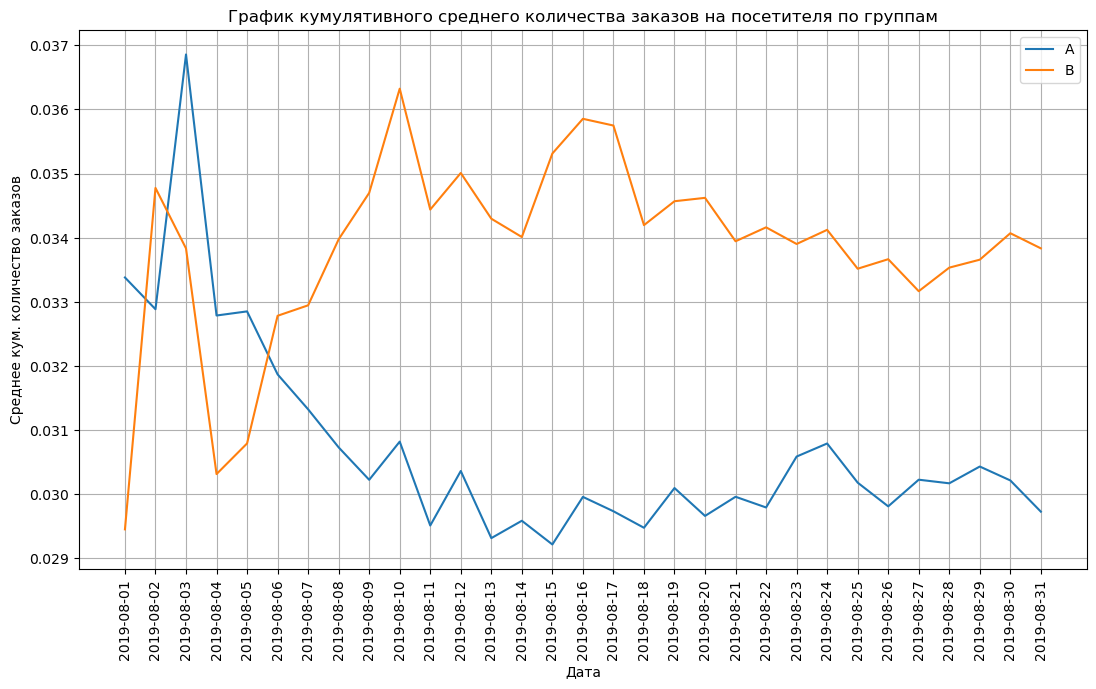

In [10]:
# Анализ графика кумулятивного среднего количества заказов на посетителя по группам.

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(13, 7))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кум. количество заказов')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

В начале теста сегмент А имел большее кумулятивное среднее количество заказов,
но после 5 августа сегмент В дал резкий рост и зафиксировался на отметке 0.034 - 0.035 заказов на посетителя.<br/>
В сегменте В после снижения показатель был стабилен в районе 0.030 заказов на одного посетителя.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

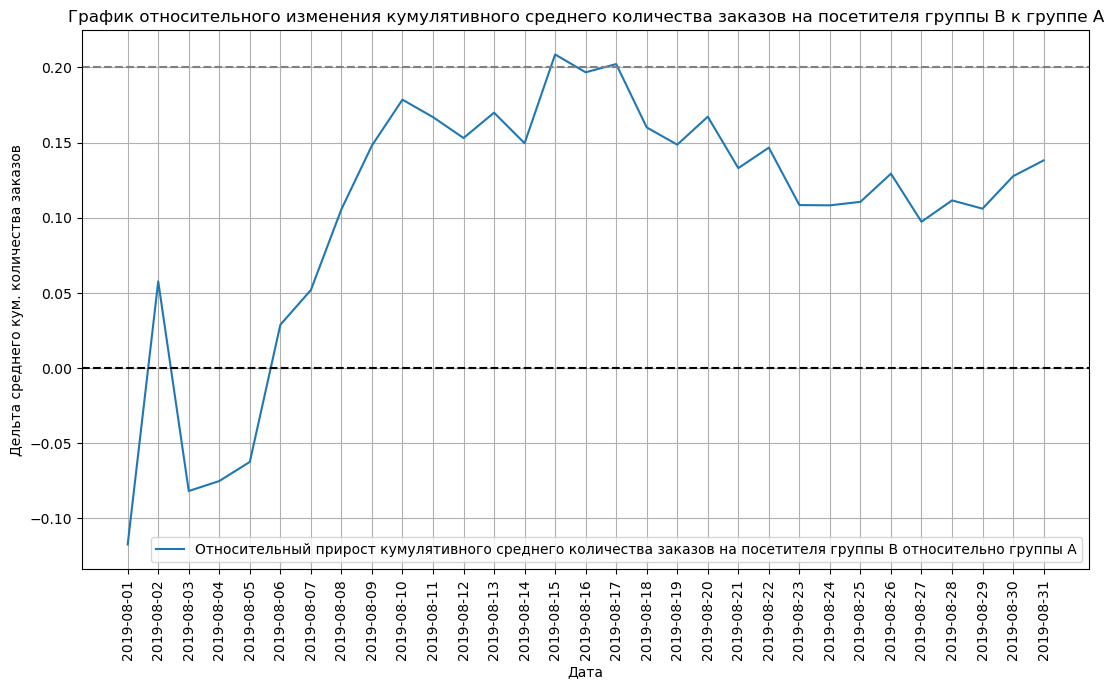

In [11]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

#---------------------------------
# Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(13, 7))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Дельта среднего кум. количества заказов')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


У группы В был прирост 2 августа, затем опустился до минус 0.08.<br/>
Начиная с 6 августа группа В лидирует по метрике:<br/>
растет до 16 августа достигнув прироста в 20%, затем, немного упав, стабилизировалась в районе 11% прироста относительно группы А.

#### Точечный график количества заказов по пользователям

In [12]:
#Проверка явных дубликатов в колонке 'transactionId' датасета 'orders'

print(orders['transactionId'].duplicated().sum())

0


Дубликатов не обнаружено.

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


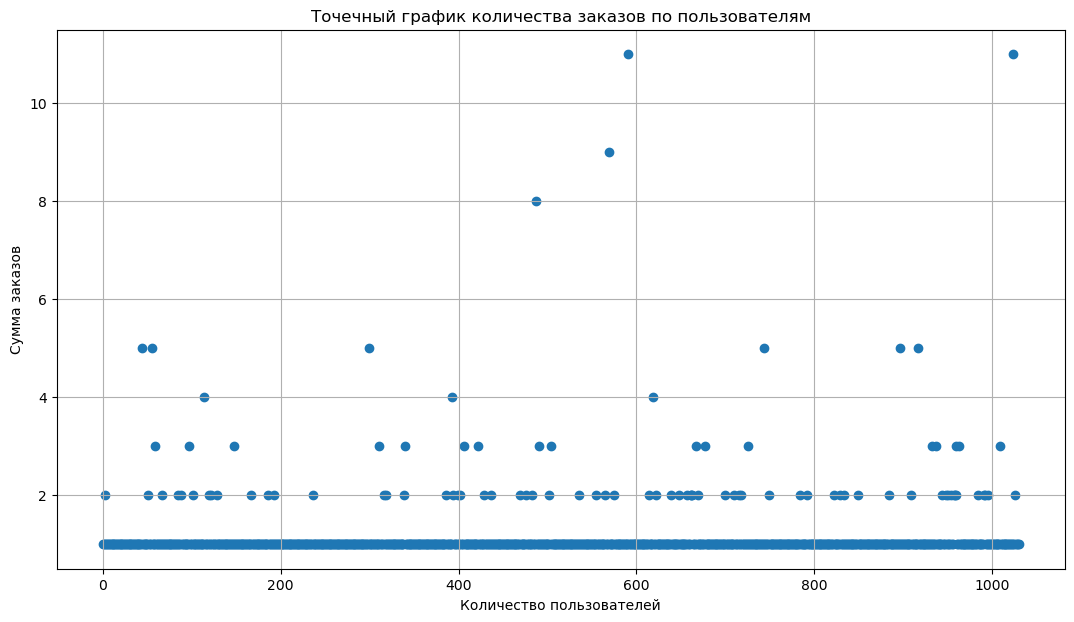

In [13]:
ordersByVisitors = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByVisitors.columns = ['visitorId', 'orders']

print(ordersByVisitors.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByVisitors)))

plt.figure(figsize=(13, 7))

# точечный график
plt.scatter(x_values, ordersByVisitors['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Сумма заказов')
plt.grid(True)
plt.show()

Много пользователей с 2-3 заказами. Также есть пользователи с более чем 10 заказами. <br/>
Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

#### Расчет 95-й и 99-й перцентилей стоимости заказов

In [14]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByVisitors['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 1% посетителей сделали более чем 4 заказа.<br/>
Не более 5% посетителей сделали более чем 2 заказа.<br/>
Можно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

#### Точечный график стоимостей заказов

      transactionId   visitorId        date  revenue group
425       590470918  1920142716  2019-08-19  1294500     B
1196     3936777065  2108080724  2019-08-15   202740     B
858       192721366  1316129916  2019-08-27    93940     A
1136      666610489  1307669133  2019-08-13    92550     A
744      3668308183   888512513  2019-08-27    86620     B
682      1216533772  4266935830  2019-08-29    78990     B
662      1811671147  4266935830  2019-08-29    78990     A
743      3603576309  4133034833  2019-08-09    67990     A
1103     1348774318  1164614297  2019-08-12    66350     A
1099      316924019   148427295  2019-08-12    65710     A


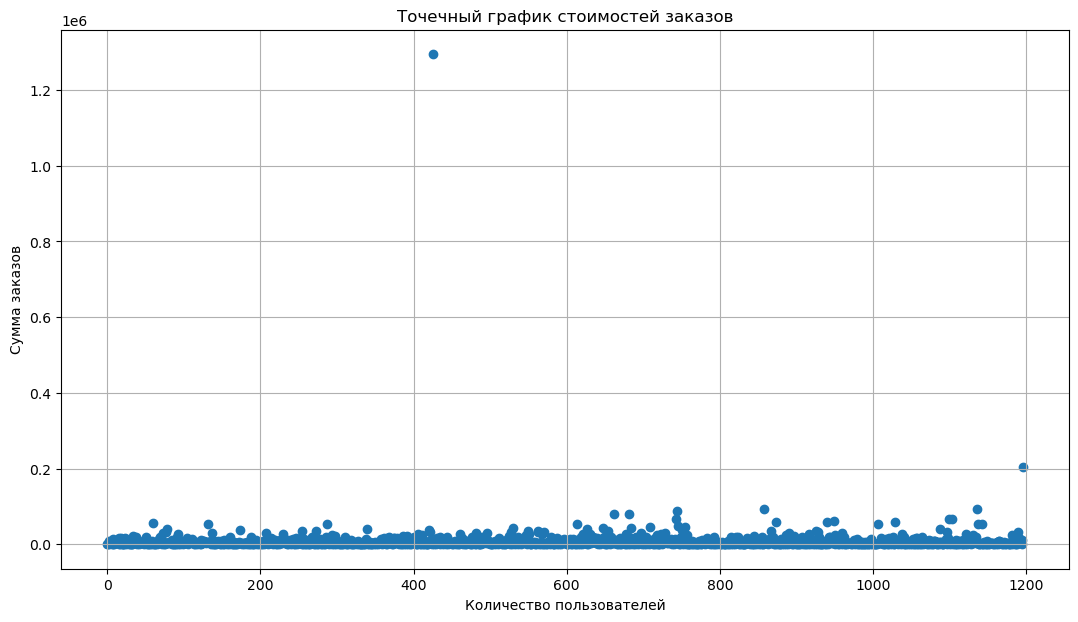

In [15]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(13, 7))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Сумма заказов')
plt.grid(True)
plt.show()

На графике и в таблице видны аномальные выбросы, например заказы стоимостью 1,294,500 руб. или 202,740 руб. <br/>
Далее распределение по перцентилям покажет их долю в общем наборе.

#### Расчет 95-й и 99-й перцентилей стоимости заказов

In [16]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28 тыс руб <br/>
И не больше, чем у 1% заказов - дороже 58 тыс руб.<br/>
Нужно выбрать сумму 28 тыс руб. за верхнюю границу стоимости чека, и отсеять аномальных сумм по ней.

#### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [17]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))
#-----------------------------------

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

#--------------------------------------

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


         date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0  2019-08-01              24           148579              21   
1  2019-08-02              20            93822              24   
2  2019-08-03              24           112473              16   
3  2019-08-04              16            70825              17   
4  2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61           

P-value меньше 0.05 - нулевую гипотезу Н0 отвергаем.<br/>
Анализ "сырых" данных сообщает, что в среднем количестве заказов между группами есть 
статистически значимые различия.<br/>
Относительный прирост среднего группы В к конверсии группы А равен 13.8%.<br/>
Осталось сравнить чеки по "сырым данным", а затем обе метрики еще раз после удаления выбросов.

#### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [18]:
# Расчет статистической значимости различия средних чеков между группами. 
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05 - статиститчески значимых отличий в среднем чеке между группами нет.<br/>
Относительное различие среднего чека между сегментами всего 26%

####  Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [19]:
# аномальные пользователи
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#---------------------------------------------------------------------

# Переменные sampleAFiltered и sampleBFiltered будут хранить очищенные данные о заказах — не включая 
# аномальных пользователей. 

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.172


P-value значительно ниже 0.05.<br/>
Cтатистическая значимость достигнута, как и в случае с "сырыми" данными. <br/>
Сегмент В значительно лучше сегмента А.

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [20]:
# Расчет статистической значимости различия средних чеков после удаления аномальных пользователей.
    
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.720
-0.023


После удаления аномальных чеков исчезла статистическая значимость различия среднего чека заказов между
группами.<br/>
Относительный прирост среднего чека очищенной группы B принял отрицательное значение. (???)

#### Принятие решения по результатам теста

 Варианты решений:<br/>
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

<b>Выводы:</b><p><p/>
1. Были явные выбросы при анализе сырых данных количества и стоимостей заказов между тестируемыми группами.
2. Анализ "сырых" данных показал статистически значимые различия между показателями групп.
3. После расчета статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, статистическая значимость была достигнута, как и в случае с "сырыми" данными.
4. После расчета статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным статистическая значимость различия среднего чека заказов между группами исчезла.

Топ 5 акций по показателю RICE: <br/>
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,   
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,   
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,   
5. Запустить акцию, дающую скидку на товар в день рождения,

На все перечисленные выше мероприятия требовалось относительно мало бюджета, поэтому, исходя из расчетов выше, менеджер отдела может принять решение продолжать дальше делать тест или остановить. <br/> 
Вероятно, здесь есть зависимоть между ассортиментом товаров и сезоном продаж. <br/>
Есть кое-где аномальные скачки. Наверное, потребители ищут те товары, которые нужны им именно сейчас, например, школьные товары в августе, новогодние подарки ближе к Новому году и т.п.  

Я бы порекомендовал руководителю продолжить тест и потом сделать анализ в более длинном промежутке времени.